In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telecom-churn/telecom_churn.csv


In [2]:
import seaborn as cat

In [7]:
df = pd.read_csv('/kaggle/input/telecom-churn/telecom_churn.csv')

In [9]:
df

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [10]:
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [11]:
#process- missing values and outliers

In [14]:
df.isna().sum() #no missing values

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='OverageFee'>

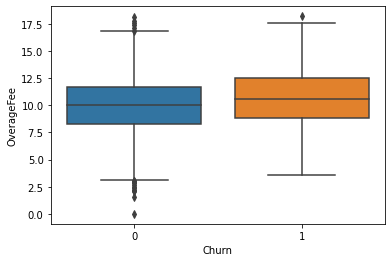

In [15]:
#boxplot
#seaborn

cat.boxplot(x='Churn',y='OverageFee',data=df)

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharge'>

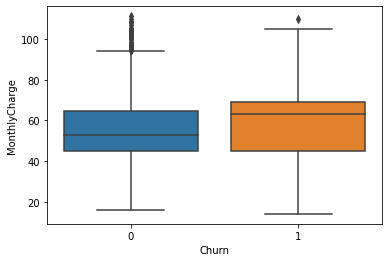

In [16]:
cat.boxplot(x='Churn',y='MonthlyCharge',data=df)

<AxesSubplot:xlabel='Churn', ylabel='CustServCalls'>

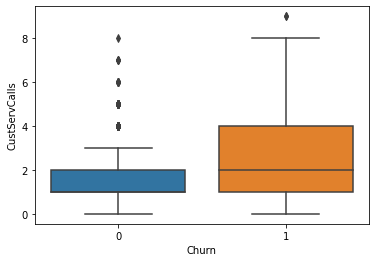

In [17]:
cat.boxplot(x='Churn',y='CustServCalls',data=df)

<AxesSubplot:xlabel='MonthlyCharge', ylabel='OverageFee'>

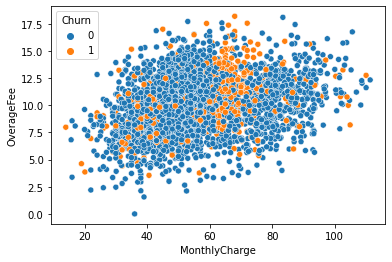

In [22]:
#2 numerical variables - we have to check the correlation visually
cat.scatterplot(x='MonthlyCharge',y='OverageFee',hue= 'Churn',data=df)


In [23]:
#You need to create multiple combinations to get sense out of the data
#What if you dont have the time to find the multiple combinations?



In [24]:
df.corr()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
Churn,1.000000,0.016541,-0.259852,-0.102148,-0.087195,0.208750,0.205151,0.018459,0.072313,0.092812,0.068239
AccountWeeks,0.016541,1.000000,-0.024735,0.002918,0.014391,-0.003796,0.006216,0.038470,0.012581,-0.006749,0.009514
ContractRenewal,-0.259852,-0.024735,1.000000,-0.006006,-0.019223,0.024522,-0.049396,-0.003755,-0.047291,-0.019105,-0.045871
DataPlan,-0.102148,0.002918,-0.006006,1.000000,0.945982,-0.017824,-0.001684,-0.011086,0.737490,0.021526,-0.001318
DataUsage,-0.087195,0.014391,-0.019223,0.945982,1.000000,-0.021723,0.003176,-0.007962,0.781660,0.019637,0.162746
CustServCalls,0.208750,-0.003796,0.024522,-0.017824,-0.021723,1.000000,-0.013423,-0.018942,-0.028017,-0.012964,-0.009640
DayMins,0.205151,0.006216,-0.049396,-0.001684,0.003176,-0.013423,1.000000,0.006750,0.567968,0.007038,-0.010155
DayCalls,0.018459,0.038470,-0.003755,-0.011086,-0.007962,-0.018942,0.006750,1.000000,-0.007963,-0.021449,0.021565
MonthlyCharge,0.072313,0.012581,-0.047291,0.737490,0.781660,-0.028017,0.567968,-0.007963,1.000000,0.281766,0.117433
OverageFee,0.092812,-0.006749,-0.019105,0.021526,0.019637,-0.012964,0.007038,-0.021449,0.281766,1.000000,-0.011023


<AxesSubplot:>

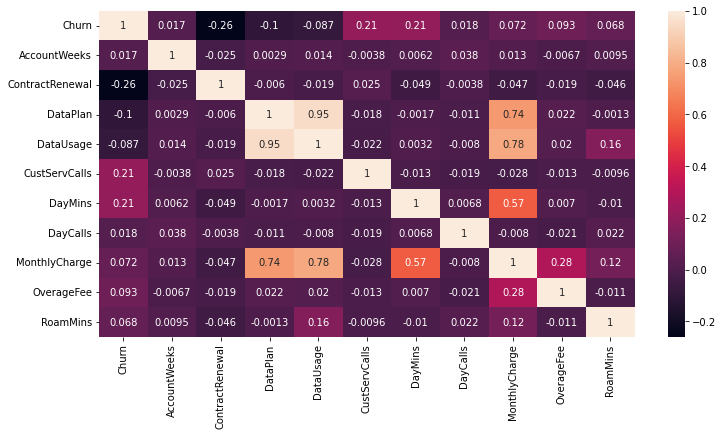

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
cat.heatmap(df.corr(), annot=True)

In [29]:
#Now i have a direction of which columns are important for analysis.Here 3 columns are important,i.e,ContractRenewal,CustServCalls and DayMins

In [30]:
#overall analysis
#If more customer service calls are made,there is a high chance of churning
#If monthly charge is high,there is a high chance of churning






